In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [3]:
import numpy as np
import pandas as pd

For this challenge we need to guess whether the individuals from the dataset had survived or not. Use the provided features and either modify, delete or add new features based on existing ones. This is a very core part of being a data scientist.

In [4]:
df_titanic = pd.read_csv("data.csv", na_filter=False)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S


In [5]:
df_titanic.shape

(891, 12)

In [6]:
del df_titanic["Ticket"]

In [7]:
del df_titanic["PassengerId"]

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(df_titanic["Sex"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = df_titanic["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

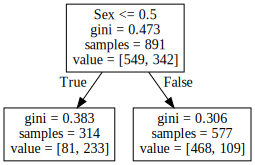

In [13]:
import graphviz
dot_data = tree.export_graphviz(tree_model, 
                              feature_names=["Sex"], 
                              out_file=None)
graph = graphviz.Source(dot_data)  
graph

In [15]:
# Get survival probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], df_titanic["Sex"])

Sex,female,male
row_0,,
0.257962,314,0
0.811092,0,577


In [16]:
# Make data frame of predictors
predictors = pd.DataFrame([encoded_sex, df_titanic["Pclass"]]).T

# Train the model
tree_model.fit(X = predictors, 
               y = df_titanic["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

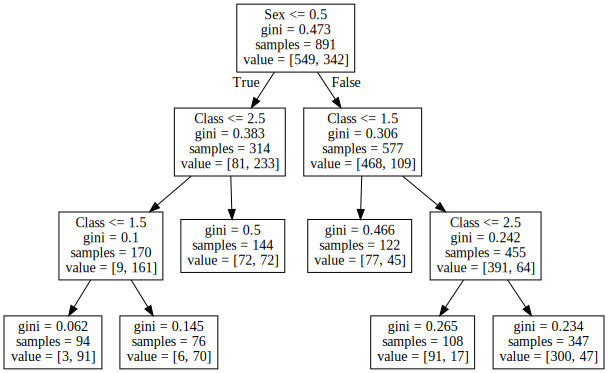

In [17]:
dot_data2 = tree.export_graphviz(tree_model, 
                              feature_names=["Sex", "Class"], 
                              out_file=None)
graph2 = graphviz.Source(dot_data2)  
graph2

In [18]:
# Get survival probability
preds = tree_model.predict_proba(X = predictors)

# Create a table of predictions by sex and class
pd.crosstab(preds[:,0], columns = [df_titanic["Pclass"], 
                                   df_titanic["Sex"]])

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

In [21]:
new_age_var = np.where(df_titanic["Age"].isnull(), # Logical check
                       0,                       # Value if check is true
                       df_titanic["Age"])     # Value if check is false

df_titanic["Age"] = new_age_var

In [23]:
df_titanic["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [24]:
df_titanic["Age"].describe()

count     891
unique     89
top          
freq      177
Name: Age, dtype: object

In [22]:
predictors = pd.DataFrame([encoded_sex,
                           df_titanic["Pclass"],
                           df_titanic["Age"],
                           df_titanic["Fare"]]).T

# Initialize model with maximum tree depth set to 8
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

tree_model.fit(X = predictors, 
               y = df_titanic["Survived"])

ValueError: could not convert string to float: 